### Machine Learning Models

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
# Features
X=df_selected.drop(columns=['Shipment Mode'])  
#Target variable
y=df_selected['Shipment Mode']  

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
#Oversampling as there is class Imbalance in our dataset
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_train, y_train)

In [54]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [55]:
models=[
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('XGBoost Classifier', XGBClassifier()),
    ('CatBoost Classifier', CatBoostClassifier(verbose=0))
]

In [56]:
for name, model in models:
    model.fit(X_resampled, y_resampled)  
    y_pred=model.predict(X_test)  

   
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred, average='weighted')  
    recall=recall_score(y_test, y_pred, average='weighted') 
    f1=f1_score(y_test, y_pred, average='weighted')  

    
    results_df=results_df.append({'Model': name, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1-Score': f1},
                                   ignore_index=True)

results_df

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18904\1477708434.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df=results_df.append({'Model': name, 'Accuracy': accuracy,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18904\1477708434.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.367925,0.647123,0.367925,0.348654
1,Support Vector Classifier,0.816712,0.912419,0.816712,0.842402
2,K-Nearest Neighbors,0.931267,0.953363,0.931267,0.937583
3,Decision Tree Classifier,0.938005,0.952105,0.938005,0.942617
4,Random Forest Classifier,0.950135,0.960435,0.950135,0.953337
5,Gradient Boosting Classifier,0.943396,0.960393,0.943396,0.948323
6,XGBoost Classifier,0.946092,0.960697,0.946092,0.950351
7,CatBoost Classifier,0.948787,0.961862,0.948787,0.952617


#### Finding the Best Model

In [57]:
best_models=[]

In [58]:
best_cat_model=CatBoostClassifier(depth=8, iterations=300, l2_leaf_reg=5, learning_rate=0.2)
best_cat_model.fit(X_resampled,y_resampled)
cat_pred=best_cat_model.predict(X_test)

accuracy=accuracy_score(y_test, cat_pred)
print("Accuracy: ",accuracy)
precision=precision_score(y_test, cat_pred, average='weighted') 
print("\nPrecision: ",precision)
recall=recall_score(y_test, cat_pred, average='weighted')
print("\nRecall: ",recall)
f1=f1_score(y_test, cat_pred, average='weighted')  
print("\nF1 Score: ",f1)

best_models.append({'Model': 'Cat Boost Classifier', 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1-Score': f1})

0:	learn: 0.9548723	total: 23ms	remaining: 6.87s
1:	learn: 0.7453311	total: 43.7ms	remaining: 6.51s
2:	learn: 0.5983295	total: 62.7ms	remaining: 6.21s
3:	learn: 0.4955973	total: 81.5ms	remaining: 6.03s
4:	learn: 0.4191898	total: 101ms	remaining: 5.97s
5:	learn: 0.3589991	total: 119ms	remaining: 5.82s
6:	learn: 0.3118109	total: 135ms	remaining: 5.67s
7:	learn: 0.2760611	total: 152ms	remaining: 5.54s
8:	learn: 0.2472671	total: 168ms	remaining: 5.44s
9:	learn: 0.2222694	total: 185ms	remaining: 5.38s
10:	learn: 0.2025101	total: 203ms	remaining: 5.34s
11:	learn: 0.1882573	total: 220ms	remaining: 5.29s
12:	learn: 0.1746708	total: 241ms	remaining: 5.33s
13:	learn: 0.1636723	total: 259ms	remaining: 5.3s
14:	learn: 0.1538104	total: 276ms	remaining: 5.25s
15:	learn: 0.1487507	total: 293ms	remaining: 5.2s
16:	learn: 0.1417001	total: 309ms	remaining: 5.15s
17:	learn: 0.1374539	total: 326ms	remaining: 5.1s
18:	learn: 0.1338273	total: 342ms	remaining: 5.06s
19:	learn: 0.1291455	total: 359ms	remainin

169:	learn: 0.0452811	total: 2.95s	remaining: 2.26s
170:	learn: 0.0451559	total: 2.97s	remaining: 2.24s
171:	learn: 0.0450589	total: 2.99s	remaining: 2.23s
172:	learn: 0.0449317	total: 3.01s	remaining: 2.21s
173:	learn: 0.0448294	total: 3.02s	remaining: 2.19s
174:	learn: 0.0447370	total: 3.04s	remaining: 2.17s
175:	learn: 0.0446611	total: 3.06s	remaining: 2.15s
176:	learn: 0.0445537	total: 3.07s	remaining: 2.14s
177:	learn: 0.0443619	total: 3.09s	remaining: 2.12s
178:	learn: 0.0441273	total: 3.11s	remaining: 2.1s
179:	learn: 0.0439982	total: 3.12s	remaining: 2.08s
180:	learn: 0.0438989	total: 3.14s	remaining: 2.06s
181:	learn: 0.0438280	total: 3.16s	remaining: 2.05s
182:	learn: 0.0437843	total: 3.19s	remaining: 2.04s
183:	learn: 0.0437659	total: 3.2s	remaining: 2.02s
184:	learn: 0.0436370	total: 3.22s	remaining: 2s
185:	learn: 0.0435101	total: 3.24s	remaining: 1.98s
186:	learn: 0.0434350	total: 3.25s	remaining: 1.97s
187:	learn: 0.0433786	total: 3.27s	remaining: 1.95s
188:	learn: 0.043

In [59]:
confusion_matrix=confusion_matrix(y_test,cat_pred)
print("Confusion Matrix of Best Model: \n",confusion_matrix)

Confusion Matrix of Best Model: 
 [[499   3  28   1]
 [  1   3   0   0]
 [  3   0  55   0]
 [  1   0   1 147]]


In [60]:
best_rf_params={
    'n_estimators': 150,  
    'max_depth': 15,     
    'min_samples_split': 4,
    'min_samples_leaf': 4,
    'random_state': 42
}

best_rf_model=RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_resampled, y_resampled)
rf_pred=best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, rf_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, rf_pred, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test, rf_pred, average='weighted')
print("F1 Score:", f1)

best_models.append({'Model': 'Random Forest Classifier', 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1-Score': f1})

Accuracy: 0.9501347708894878
Precision: 0.9636556387995195
Recall: 0.9501347708894878
F1 Score: 0.9539706070116958


In [61]:
best_xgb_params = {
    'n_estimators': 150,
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.6,
    'colsample_bytree': 0.8,
    'objective': 'multi:softmax',
    'num_class': len(y.unique()), 
    'random_state': 42
}


best_xgb_model = XGBClassifier(**best_xgb_params)
best_xgb_model.fit(X_resampled, y_resampled)
xgb_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, xgb_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, xgb_pred, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test, xgb_pred, average='weighted')
print("F1 Score:", f1)

best_models.append({'Model': 'XGB Classifier', 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1-Score': f1})

Accuracy: 0.9474393530997305
Precision: 0.9636060157257538
Recall: 0.9474393530997305
F1 Score: 0.9518960914108301


In [62]:
best_gb_params={
    'n_estimators': 150,
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.6,
    'random_state': 42
}

best_gb_model=GradientBoostingClassifier(**best_gb_params)
best_gb_model.fit(X_resampled, y_resampled)


gb_pred=best_gb_model.predict(X_test)


accuracy=accuracy_score(y_test, gb_pred)
print("Accuracy:", accuracy)
precision=precision_score(y_test, gb_pred, average='weighted')
print("Precision:", precision)
recall=recall_score(y_test, gb_pred, average='weighted')
print("Recall:", recall)
f1=f1_score(y_test, gb_pred, average='weighted')
print("F1 Score:", f1)

best_models.append({'Model': 'Gradient Boosting Classifier', 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1-Score': f1})

Accuracy: 0.9514824797843666
Precision: 0.9639710923485825
Recall: 0.9514824797843666
F1 Score: 0.9551151298016408


In [63]:
print("Model Scores after Hypertuning:")
best_models_score=pd.DataFrame(best_models)
best_models_score

Model Scores after Hypertuning:


,Model,Accuracy,Precision,Recall,F1-Score
0,Cat Boost Classifier,0.948787,0.961862,0.948787,0.952617
1,Random Forest Classifier,0.950135,0.963656,0.950135,0.953971
2,XGB Classifier,0.947439,0.963606,0.947439,0.951896
3,Gradient Boosting Classifier,0.951482,0.963971,0.951482,0.955115


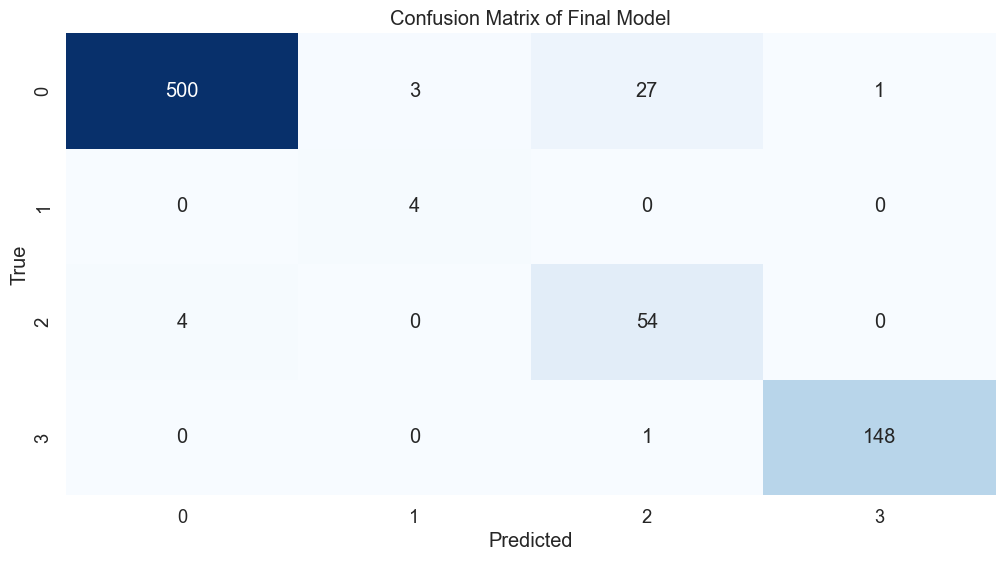

In [64]:
from sklearn.metrics import confusion_matrix

confusion_gb = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  
sns.heatmap(confusion_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Final Model')
plt.show()